In [40]:
# ! pip install -U matplotlib
# ! pip install -U numpy
# ! pip install -U scipy
# ! pip install ipympl

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift, fft, fftfreq
from random import randint
%matplotlib widget

In [42]:
def plot(*args, y=None, stem=False):
    ax = plt.figure()
    if y is None:
        for y in args:
            x = np.arange(y.size)
            if stem:
                plt.stem(x, y)
            else:
                plt.plot(x, y)
    else:
        if stem:
            plt.stem(args[0], y)
        else:
            plt.plot(args[0], y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

## Построение нерекурсивных цифровых фильтров методом частотной выборки и их применение


### Проектирование нерекурсивного фильтра


In [43]:
def filtr(array_1: np.ndarray,
          array_2: np.ndarray) -> np.ndarray:
    return signal.convolve(array_1, array_2, mode="full")

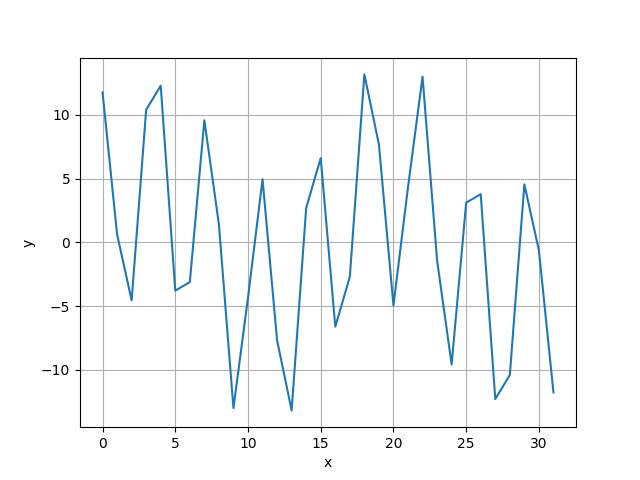

In [44]:
def y(x: np.ndarray) -> np.ndarray:
    return 10 * np.sin(9 * 2 * np.pi * x) + 5 * np.sin(2 * 2 * np.pi * x)


N = 33
DX = 1 / N
x = np.arange(start=1, stop=N)
sig = y(x * DX)
plot(sig)

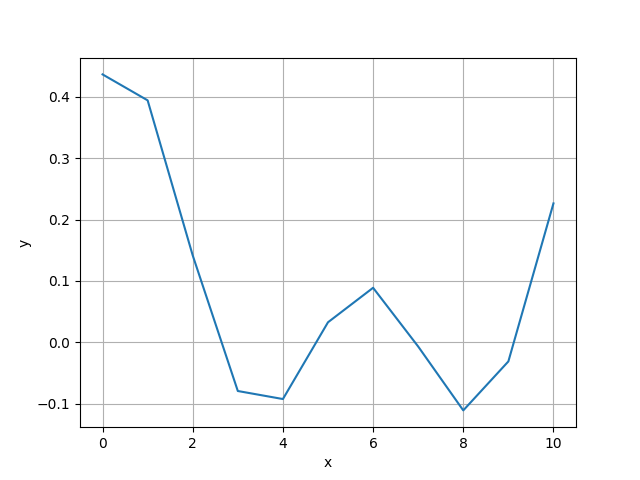

In [45]:
IR = np.array([0.4366, 0.3943, 0.1416, -0.0793, -0.0924,
              0.0327, 0.0889, -0.0068, -0.1109, -0.0311, 0.2264])
plot(IR)

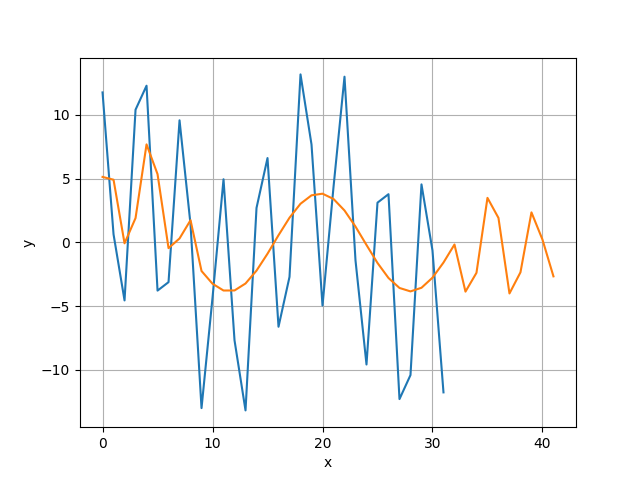

In [46]:
plot(sig, filtr(sig, IR))

### Частотный фильтр


In [47]:
FMAX = 10

In [48]:
def y(x: np.ndarray) -> np.ndarray:
    return 3 * np.sin(FMAX * 2 * np.pi * x) + 2 * np.sin((FMAX / 4) * 2 * np.pi * x)

In [49]:
def y_filterred_reference(x: np.ndarray) -> np.ndarray:
    return 2 * np.sin((FMAX / 4) * 2 * np.pi * x)

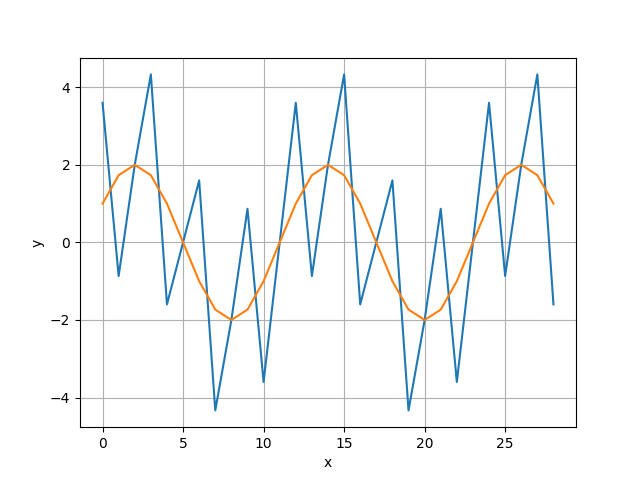

In [50]:
N = 30
T = 1
dx = T / N
fd = 1 / dx
x = np.arange(start=1, stop=N)
sig = y(x * dx)
filtered_reference = y_filterred_reference(x * dx)
plot(sig, filtered_reference)

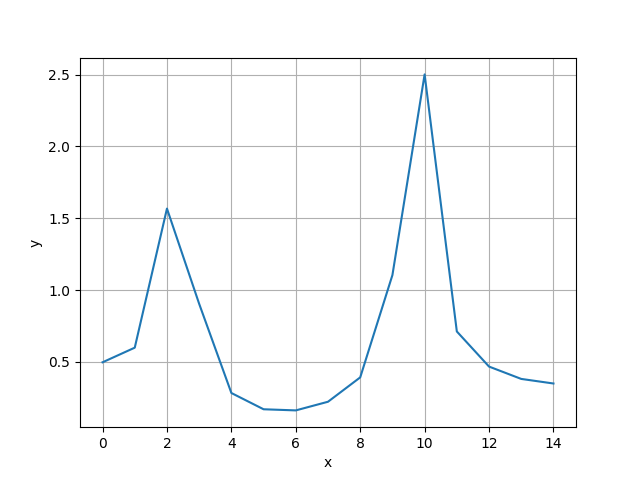

In [51]:
yf = fft(sig)
xf = fftfreq(N, dx)[:N // 2]
plot(xf, y=2.0 / N * np.abs(yf[0:N // 2]))

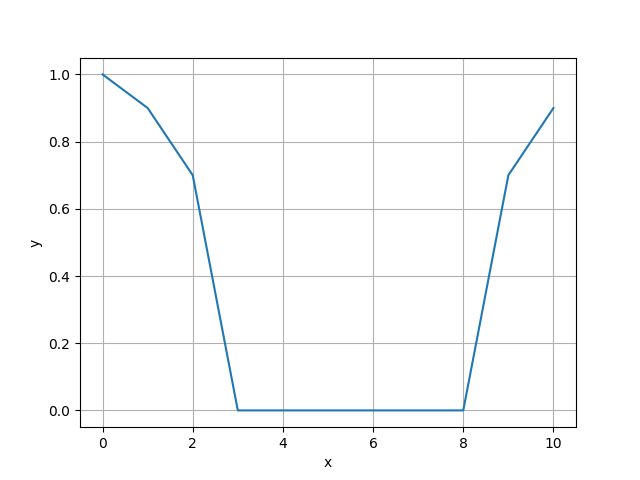

In [52]:
Ha = np.array([1, 0.9, 0.7, 0, 0, 0, 0, 0, 0, 0.7, 0.9])
plot(Ha)

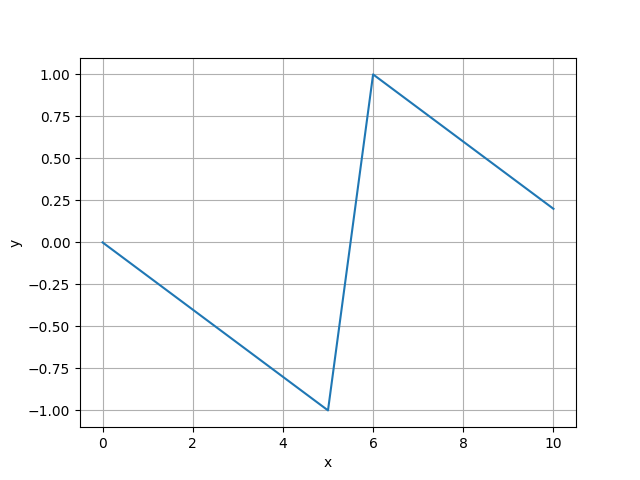

In [53]:
Fa = np.array([0, -0.2, -0.4, -0.6, -0.8, -1, 1, 0.8, 0.6, 0.4, 0.2])
plot(Fa)

In [54]:
def arexp(array: np.ndarray) -> np.ndarray:
    result = np.zeros(array.size)
    for idx in range(result.size):
        result[idx] = np.exp(array[idx] * 1j)
    return result

C:\Users\playe\AppData\Local\Temp\ipykernel_19696\1513061477.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  result[idx] = np.exp(array[idx] * 1j)


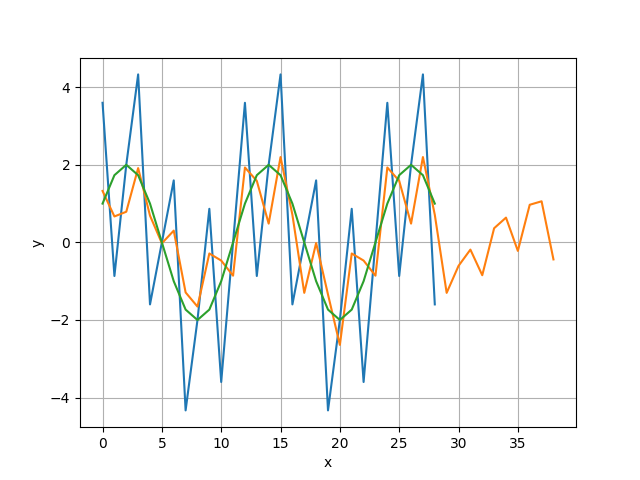

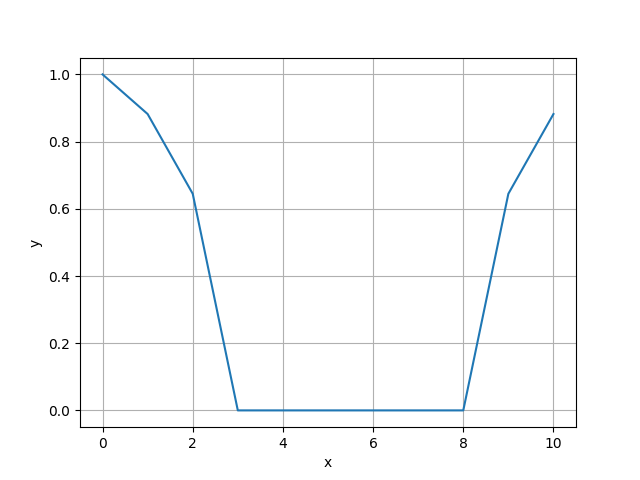

In [55]:
Fe = arexp(Fa)
IR = np.fft.ifft(Ha * Fe)
plot(sig, filtr(sig, IR), filtered_reference)
plot(np.abs(np.fft.fft(IR)))

### Эффект Гибса


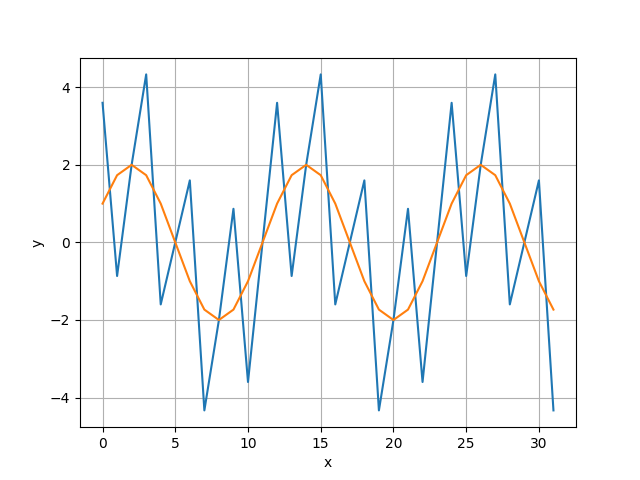

In [56]:
N = 33
x = np.arange(start=1, stop=N)
sig = y(x * dx)
filtered_reference = y_filterred_reference(x * dx)
plot(sig, filtered_reference)

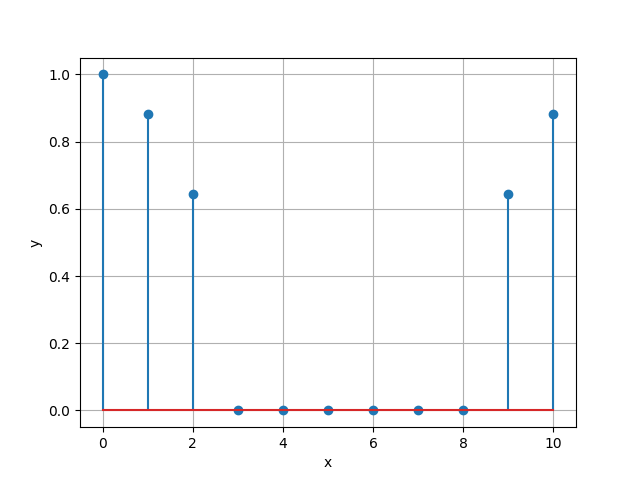

array([ 0.,  3.,  6.,  9., 11., 14., 17., 20., 22., 25., 28., 30.])

In [57]:
fir = np.ceil(np.arange(IR.size + 1) * (fd / IR.size))
plot(np.abs(np.fft.fft(IR)), stem=True)
fir

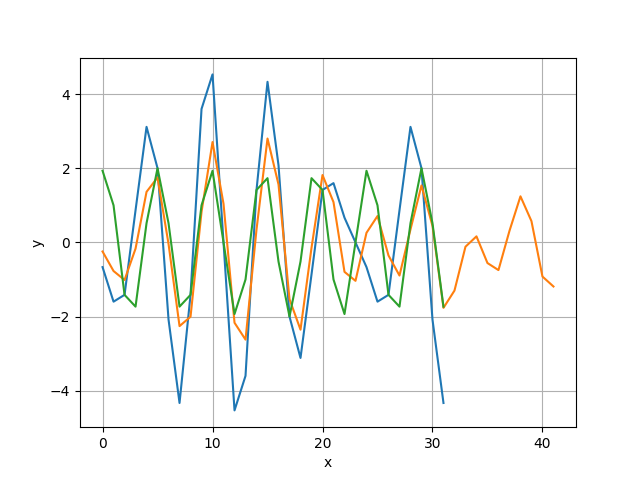

In [69]:
N = 33
FMAX = 25
x = np.arange(start=1, stop=N)
sig = y(x * dx)
filtered_reference = y_filterred_reference(x * dx)
plot(sig, filtr(sig, IR), filtered_reference)